In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('root2ai - Data.csv')

In [3]:
data['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

In [4]:
data

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


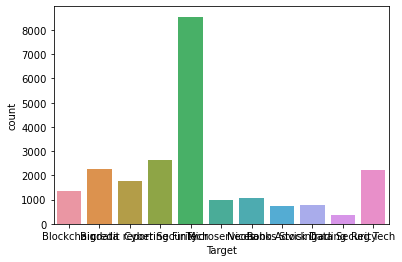

In [5]:
import seaborn as sns
sns.countplot(data['Target'])

In [6]:
import re

In [7]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejashwini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus=[]

In [9]:
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',str(data['Text'][i]))
    review = review.lower()
    review = review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


In [10]:
data

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


In [11]:
len(np.unique(corpus))

20901

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 

In [13]:
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [14]:
y=data.iloc[:,-1:]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import tensorflow as tf
import os

VOCAB_SIZE=20911     #20911 unique words
MAXLEN=250
BATCH_SIZE=64
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=VOCAB_SIZE)

In [17]:
len(X_train[0])

218

In [18]:
X_train=sequence.pad_sequences(X_train,MAXLEN)
X_test=sequence.pad_sequences(X_test,MAXLEN)

CREATING THE MODEL

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE,32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          669152    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 677,505
Trainable params: 677,505
Non-trainable params: 0
_________________________________________________________________


TRAINING

In [21]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])

history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 30s 49ms/step - loss: 0.4211 - acc: 0.8084 - val_loss: 0.3556 - val_acc: 0.8442
Epoch 2/10
625/625 [==============================] - 41s 66ms/step - loss: 0.2531 - acc: 0.9028 - val_loss: 0.3024 - val_acc: 0.8732
Epoch 3/10
625/625 [==============================] - 39s 62ms/step - loss: 0.2054 - acc: 0.9230 - val_loss: 0.2755 - val_acc: 0.8910
Epoch 4/10
625/625 [==============================] - 37s 60ms/step - loss: 0.1729 - acc: 0.9373 - val_loss: 0.2942 - val_acc: 0.8778
Epoch 5/10
625/625 [==============================] - 37s 59ms/step - loss: 0.1579 - acc: 0.9436 - val_loss: 0.2847 - val_acc: 0.8840
Epoch 6/10
625/625 [==============================] - 37s 59ms/step - loss: 0.1385 - acc: 0.9499 - val_loss: 0.4573 - val_acc: 0.8630
Epoch 7/10
625/625 [==============================] - 38s 61ms/step - loss: 0.1282 - acc: 0.9546 - val_loss: 0.3454 - val_acc: 0.8836
Epoch 8/10
625/625 [==============================] - 43s 69ms

MAKING PREDICTIONS

In [22]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[10406,  1339],
       [ 2094, 11161]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86268

In [25]:
from sklearn.metrics import precision_score

In [26]:
precision_score(y_test,y_pred)

0.8420218785364013